In [ ]:
from scipy.stats import multivariate_normal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 8)

################################ DATA Generator SECTION ###################################
################################ EXECUTED ONLY ONCE     ###################################
################################ DATA ARE IN CSV FILES  ###################################

# mu_s_1 = [[3, 6],
#        [5, 4],
#        [6, 6]]
# cov_s_1 = [[[1.5, 0], [0, 1.5]],
#            [[2, 0], [0, 2]],
#            [[1, 0], [0, 1]]]


# mu_s_2 =[[3, 6],
#          [5, 4],
#          [6, 6]]
# cov_s_2 = [[[1.5, 0.1], [0.1, 1.5]],
#            [[1, -0.20], [-0.20, 2]],
#            [[2, -0.25], [-0.25, 1.5]]]

# SIZE = 500

# def generate_dataset(mu_s, cov_s, label_sampels_size):
#     dataset = pd.DataFrame(data={'X1': [], 'X2': [], 'Y':[]})
#     for i, mu_cov in enumerate(zip(mu_s, cov_s)):
#         mu, cov = mu_cov
#         x1, x2 = np.random.multivariate_normal(mu, cov, label_sampels_size).T
#         temp = pd.DataFrame(data={'X1': x1, 'X2': x2, 'Y': [i]*label_sampels_size})
#         dataset = pd.concat([dataset, temp],axis=0)
#     return dataset

# dataset1 = generate_dataset(mu_s_1, cov_s_1, SIZE)
# dataset2 = generate_dataset(mu_s_2, cov_s_2, SIZE)
# dataset1.to_csv('dataset1.csv', index=False)
# dataset2.to_csv('dataset2.csv', index=False)

In [213]:
from scipy.stats import multivariate_normal
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import math
from sympy import *
plt.rcParams["figure.figsize"] = (10, 8)

def load_data(path):
  data = pd.read_csv(path)
  X_train, X_test, y_train, y_test = train_test_split(data[['X1','X2']],data['Y'], test_size=0.2, stratify=data['Y'] ,random_state=42)
  return X_train, X_test, y_train, y_test 

def raw_data(path):
  data = pd.read_csv(path)
  return data

def data_info(X, y):
    n_features = X.shape[1]
    classes = np.unique(y)
    classes.sort()
    means = []#np.asmatrix(np.zeros((classes.size, n_features)))
    priors = np.zeros(classes.size)
    return (n_features, classes, means, priors)

def class_covariance(X, mean):
    return (X - mean).T @ (X - mean) / X.shape[0]

def fit(X_train, y_train):
    n_features, classes, means, priors = data_info(X_train, y_train)
    cov_matrices = []
    for i, y in enumerate(classes):
        priors[i] = y_train[y_train == y].size / y_train.size
        mean = np.mean(X_train[y_train == y], axis=0)
        means.append(np.asmatrix(mean))
        cov_matrices.append(class_covariance(np.asmatrix(X_train[y_train == y].values), means[i]))
    return means, priors, cov_matrices, classes

def predict(X, means, priors, cov_matrices, classes):
    probs = np.asmatrix(np.zeros((X.shape[0], priors.size)))
    for i, _ in enumerate(classes):
        probs[:, i] = probability(X, means[i], priors[i], cov_matrices[i])
    probs_arg_max = np.argmax(probs, axis=1)
    return probs_arg_max

def probability(X, mean, prior, covariance_matrix):
    X = np.asmatrix(X.values)
    cov_matrix_det = np.linalg.det(covariance_matrix)
    cov_matrix_inv = np.linalg.pinv(covariance_matrix)
    Xm = X - mean
    Xm_covariance = (Xm @ cov_matrix_inv) @ Xm.T
    Xm_covariance_sum = Xm_covariance.sum(axis=1)
    return -0.5*Xm_covariance_sum - 0.5*np.log(cov_matrix_det) + np.log(prior)



0.7466666666666667


matrix([[4.82148288],
        [9.27650109]])

Dataset 2, Train ACC =  0.7466666666666667


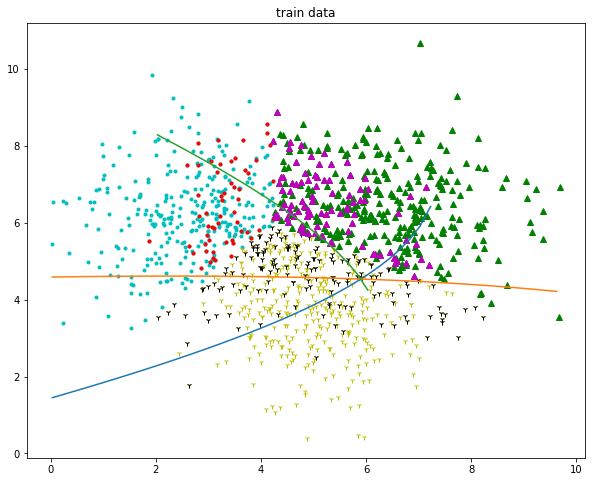

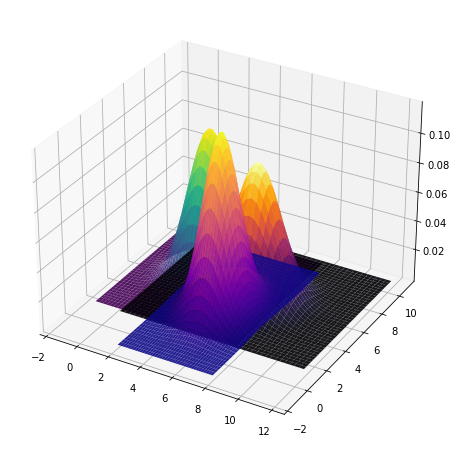

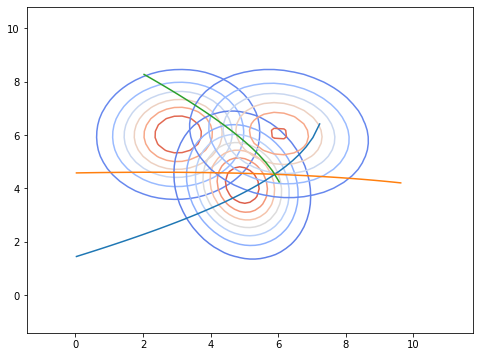

In [264]:
import warnings

def plot_pdfs(data, db, predicted, mus, sigmas, labels, priors, y_train):
    
    ax = plt.axes(projection="3d")

    colors = [('b', 'viridis'), ('r', 'plasma'), ('g', 'inferno')]

    fig2 = plt.figure(figsize=(8, 6))
    ax2 = fig2.gca()

    for cls in range(len(labels)):
        mu = np.asarray(mus[cls]).flatten()
        x = np.linspace(mu[0] - 3 * sigmas[cls][0, 0], mu[0] + 3 * sigmas[cls][0, 0], 40).flatten()
        y = np.linspace(mu[1] - 3 * sigmas[cls][1, 1], mu[1] + 3 * sigmas[cls][1, 1], 40).flatten()
        X, Y = np.meshgrid(x, y)
        pos = np.empty(X.shape + (2,))
        pos[:, :, 0] = X
        pos[:, :, 1] = Y
        rv = multivariate_normal([mu[0], mu[1]], sigmas[cls])
        Z = rv.pdf(pos)
        ax.plot_surface(X, Y, Z, cmap=colors[cls][1], linewidth=0.2, alpha=0.9, shade=True)
        ax2.contour(X, Y, Z, cmap='coolwarm')
#     db = decision_boundaries(data, predicted, mus, sigmas, priors)
    for i in range(len(labels)):
        x1 = db[i][0]
        x2 = db[i][1]
        ax2.plot(x1, x2)

def plot_dec_boundary(data_x, db, prediction, data_y, means, cov_matrices, priors, title):
    missed_0 = np.take(data_x, np.setdiff1d(np.where(prediction == 0), np.where(data_y == 0)), axis=0)
    missed_1 = np.take(data_x, np.setdiff1d(np.where(prediction == 1), np.where(data_y == 1)), axis=0)
    missed_2 = np.take(data_x, np.setdiff1d(np.where(prediction == 2), np.where(data_y == 2)), axis=0)
    cl0 = np.delete(data_x, np.where(prediction != 0), axis=0)
    cl1 = np.delete(data_x, np.where(prediction != 1), axis=0)
    cl2 = np.delete(data_x, np.where(prediction != 2), axis=0)
    plt.plot(cl0[:, 0], cl0[:, 1], '.c')
    plt.plot(missed_0[:, 0], missed_0[:, 1], '.r')
    plt.plot(cl1[:, 0], cl1[:, 1], '1y')
    plt.plot(missed_1[:, 0], missed_1[:, 1], '1k')
    plt.plot(cl2[:, 0], cl2[:, 1], '^g')
    plt.plot(missed_2[:, 0], missed_2[:, 1], '^m')
#     db = decision_boundaries(data_x, prediction, means, cov_matrices, priors)
    for i in range(3):
        x1 = db[i][0]
        x2 = db[i][1]
        plt.plot(x1, x2)
    plt.title(title)
    plt.show()
    return

def decision_boundaries(data_x, data_y, means, cov_matrices, priors):
    items = [(0,1), (0,2), (1,2)]
    decision_boundaries = []
    for item in items:
        i,j = item
        X = data_x[(data_y == i) | (data_y == j)]
        x = np.arange(X.min(axis=0)[0], X.max(axis=0)[0], 0.2)
        det_i = np.linalg.det(cov_matrices[i])
        det_j = np.linalg.det(cov_matrices[j])
        inv_i = np.linalg.pinv(cov_matrices[i])
        inv_j = np.linalg.pinv(cov_matrices[j])
        mu_i  = means[i]
        mu_j  = means[j]
        a = -0.5 * (inv_i - inv_j)
        b = (inv_i @ mu_i.T) - (inv_j @ mu_j.T)
        c = np.log(priors[i]/priors[j]) - 1/2 * np.log(det_i/det_j)
        c = c + (-0.5 * (mu_i @ inv_i) @ mu_i.T) + (0.5 * (mu_j @ inv_j) @ mu_j.T)
        a1 = a[0,0]
        a2 = a[0,1]
        a3 = a[1,0]
        a4 = a[1,1]
        b1 = b[0,0]
        b2 = b[1,0]
        c = c[0,0]
        result = []
        for x2 in x:
            x1 = symbols('x')
            equation = x1**2  * a1 + x1*x2*a3 + x1*x2*a2 + x2**2 * a4 + b1*x1 + b2*x2 + c
            r = solve(Eq(equation,0), x1, domain=S.Reals)
            if(i == 0 and j == 1):
                r = r[0]
            else:
                r = r[1]
            if (type(r) is Float):
                result.append(r)
        result = list(zip(x,result))
        result = [(x1,x2) for x1,x2 in result if type(x2) is Float]
        x = []
        r = []
        for x1,x2 in result:
            x.append(x1)
            r.append(x2)
        decision_boundaries.append((x, r))
#         decision_boundaries.append((x, result))
    return decision_boundaries


X_train, X_test, y_train, y_test = load_data('dataset2.csv')
means, priors, cov_matrices, classes = fit(X_train, y_train)
predicted = predict(X_train, means, priors, cov_matrices, classes)
predicted = np.array([p[0,0] for p in predicted])
print("Dataset 2, Train ACC = ", accuracy_score(y_train, predicted))
results  = decision_boundaries(X_train.values, predicted, means, cov_matrices, priors)
plot_dec_boundary(X_train.values, results, predicted, y_train.values, means, cov_matrices,priors, "train data")
plot_pdfs(X_train.values, results, predicted, means, cov_matrices, classes, priors, X_train.values)

Dataset 2, Test ACC =  0.7166666666666667


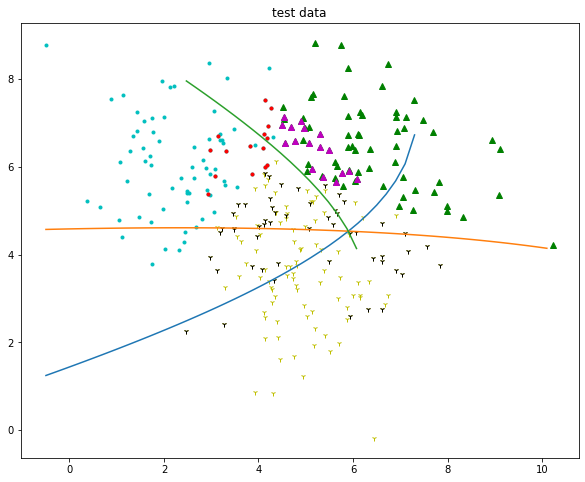

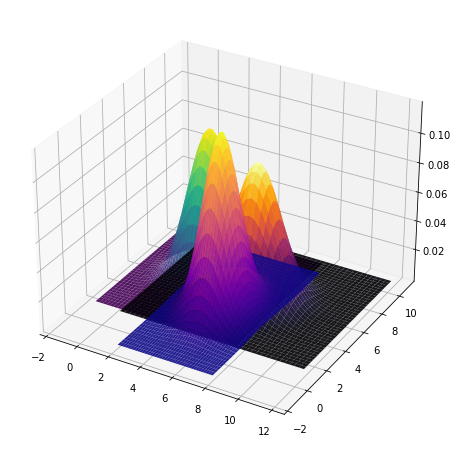

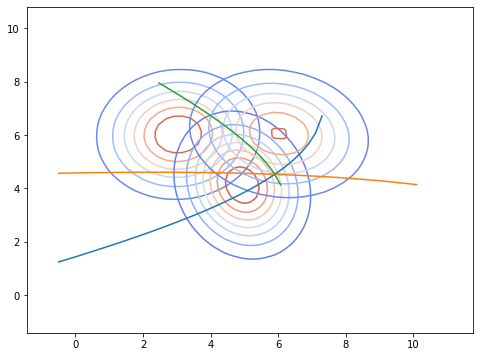

In [265]:
predicted = predict(X_test, means, priors, cov_matrices, classes)
print("Dataset 2, Test ACC = ", accuracy_score(y_test, predicted))
predicted = np.array([p[0,0] for p in predicted])
results  = decision_boundaries(X_test.values, predicted, means, cov_matrices, priors)
plot_dec_boundary(X_test.values, results, predicted, y_test.values, means, cov_matrices,priors, "test data")
plot_pdfs(X_test.values, results, predicted, means, cov_matrices, classes, priors, y_test.values)


Dataset 1, Train ACC =  0.7675


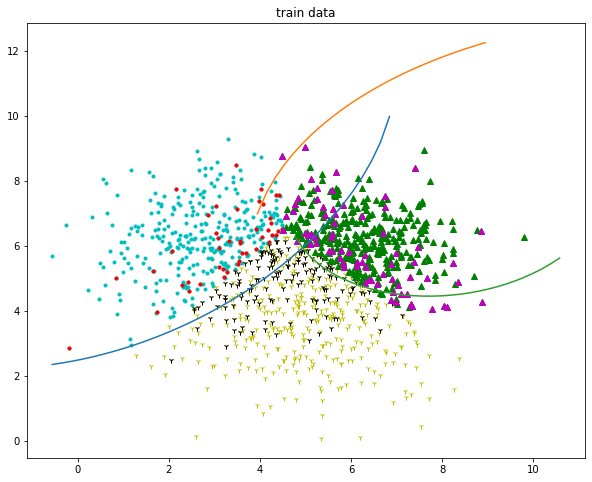

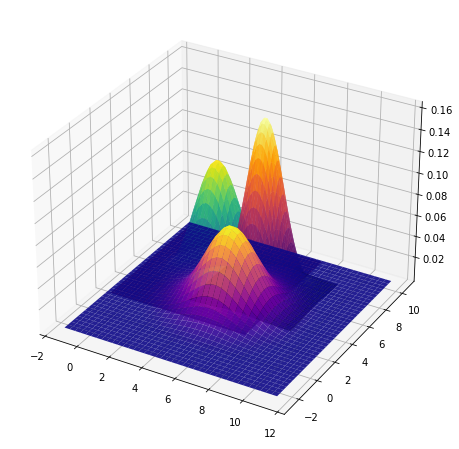

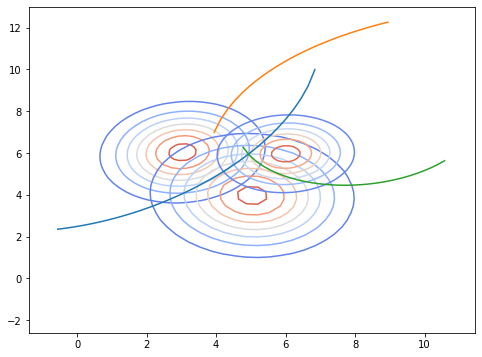

In [266]:
def decision_boundaries(data_x, data_y, means, cov_matrices, priors):
    items = [(0,1), (0,2), (1,2)]
#     items = [(0,1)] # 0
#     items = [(0,2)] # 1
#     items = [(1,2)] # 0
    decision_boundaries = []
    for item in items:
        i,j = item
        X = data_x[(data_y == i) | (data_y == j)]
#         x = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 40).flatten().T
        x = np.arange(X.min(axis=0)[0], X.max(axis=0)[0], 0.2)
        det_i = np.linalg.det(cov_matrices[i])
        det_j = np.linalg.det(cov_matrices[j])
        inv_i = np.linalg.pinv(cov_matrices[i])
        inv_j = np.linalg.pinv(cov_matrices[j])
        mu_i  = means[i]
        mu_j  = means[j]
        a = -0.5 * (inv_i - inv_j)
        b = (inv_i @ mu_i.T) - (inv_j @ mu_j.T)
        c = np.log(priors[i]/priors[j]) - 1/2 * np.log(det_i/det_j)
        c = c + (-0.5 * (mu_i @ inv_i) @ mu_i.T) + (0.5 * (mu_j @ inv_j) @ mu_j.T)
        a1 = a[0,0]
        a2 = a[0,1]
        a3 = a[1,0]
        a4 = a[1,1]
        b1 = b[0,0]
        b2 = b[1,0]
        c = c[0,0]
#         print(a1,' ,',a2 ,',', a3 ,',', a4)
#         print(b1,' ,',b2)
#         print(c)
        result = []
        for x1 in x:
            x2 = symbols('x')
            equation = x1**2  * a1 + x1*x2*a3 + x1*x2*a2 + x2**2 * a4 + b1*x1 + b2*x2 + c
            r = solve(Eq(equation,0), x2, domain=S.Reals)
            if(i == 0 and j == 2):
                r = r[1]
            else:
                r = r[0]
            if (type(r) is Float):
                result.append(r)
        result = list(zip(x,result))
        result = [(x1,x2) for x1,x2 in result if type(x2) is Float]
        x = []
        r = []
        for x1,x2 in result:
            if(i == 0 and j == 2):
                x1+=4.5
            if(i == 1 and j == 2):
                x1+=3.5
            x.append(x1)
            r.append(x2)
        
        decision_boundaries.append((x, r))
    return decision_boundaries

X_train, X_test, y_train, y_test = load_data('dataset1.csv')
means, priors, cov_matrices, classes = fit(X_train, y_train)
predicted = predict(X_train, means, priors, cov_matrices, classes)
predicted = np.array([p[0,0] for p in predicted])
print("Dataset 1, Train ACC = ", accuracy_score(y_train, predicted))
results  = decision_boundaries(X_train.values, predicted, means, cov_matrices, priors)
plot_dec_boundary(X_train.values, results, predicted, y_train.values, means, cov_matrices,priors, "train data")
plot_pdfs(X_train.values, results, predicted, means, cov_matrices, classes, priors, y_train.values)


Dataset 1, Test ACC =  0.76


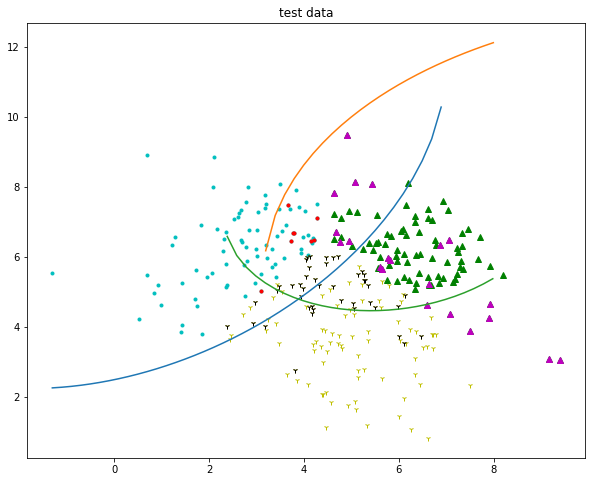

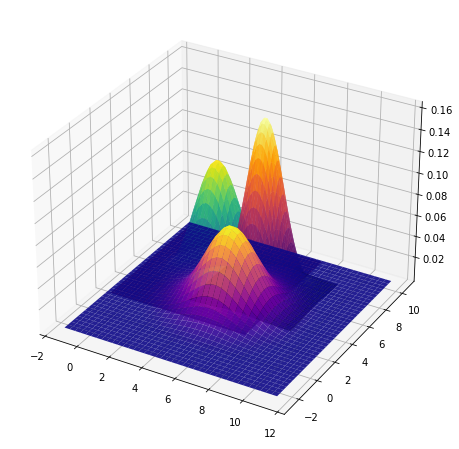

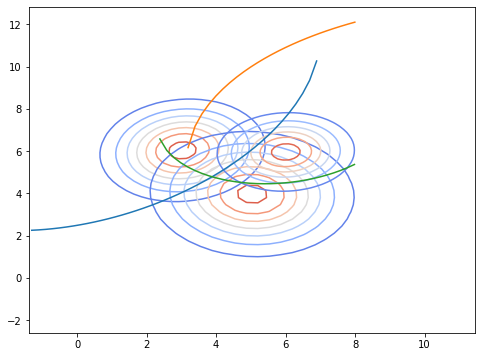

In [267]:
def decision_boundaries(data_x, data_y, means, cov_matrices, priors):
    items = [(0,1), (0,2), (1,2)]
#     items = [(0,1)] # 0
#     items = [(0,2)] # 1
#     items = [(1,2)] # 0
    decision_boundaries = []
    for item in items:
        i,j = item
        X = data_x[(data_y == i) | (data_y == j)]
#         x = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 40).flatten().T
        x = np.arange(X.min(axis=0)[0], X.max(axis=0)[0], 0.2)
        det_i = np.linalg.det(cov_matrices[i])
        det_j = np.linalg.det(cov_matrices[j])
        inv_i = np.linalg.pinv(cov_matrices[i])
        inv_j = np.linalg.pinv(cov_matrices[j])
        mu_i  = means[i]
        mu_j  = means[j]
        a = -0.5 * (inv_i - inv_j)
        b = (inv_i @ mu_i.T) - (inv_j @ mu_j.T)
        c = np.log(priors[i]/priors[j]) - 1/2 * np.log(det_i/det_j)
        c = c + (-0.5 * (mu_i @ inv_i) @ mu_i.T) + (0.5 * (mu_j @ inv_j) @ mu_j.T)
        a1 = a[0,0]
        a2 = a[0,1]
        a3 = a[1,0]
        a4 = a[1,1]
        b1 = b[0,0]
        b2 = b[1,0]
        c = c[0,0]
#         print(a1,' ,',a2 ,',', a3 ,',', a4)
#         print(b1,' ,',b2)
#         print(c)
        result = []
        for x1 in x:
            x2 = symbols('x')
            equation = x1**2  * a1 + x1*x2*a3 + x1*x2*a2 + x2**2 * a4 + b1*x1 + b2*x2 + c
            r = solve(Eq(equation,0), x2, domain=S.Reals)
            if(i == 0 and j == 2):
                r = r[1]
            else:
                r = r[0]
            if (type(r) is Float):
                result.append(r)
        result = list(zip(x,result))
        result = [(x1,x2) for x1,x2 in result if type(x2) is Float]
        x = []
        r = []
        for x1,x2 in result:
            if(i == 0 and j == 2):
                x1+=4.5
            x.append(x1)
            r.append(x2)
        
        decision_boundaries.append((x, r))
    return decision_boundaries

predicted = predict(X_test, means, priors, cov_matrices, classes)
print("Dataset 1, Test ACC = ", accuracy_score(y_test, predicted))
predicted = np.array([p[0,0] for p in predicted])
results  = decision_boundaries(X_test.values, predicted, means, cov_matrices, priors)
plot_dec_boundary(X_test.values, results, predicted, y_test.values, means, cov_matrices,priors, "test data")
plot_pdfs(X_test.values, results, predicted, means, cov_matrices, classes, priors, y_test.values)
